In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

In [2]:
size = 10
st1 = int(0.33 * size)
st2 = int(0.33 * size)
st3 = size - st1 - st2

data_X = np.sort(np.random.uniform(-1, 1, size=size))
data_Y = np.array([0 for x in range(int(0.5 * size))] + [1 for x in range(size - int(0.5 * size))])
# data_Y = np.array([0 for _ in range(st1)] + [0 if x < 0 else 1 for x in np.random.randn(st2)] + [1 for _ in range(st3)])

df = pd.DataFrame({'intercept': 1,
                   'data': data_X,
                   'label': data_Y})
display(df)

X = df[['data', 'data']].values
Y = df[['label']].values

,intercept,data,label
0,1,-0.975728,0
1,1,-0.922748,0
2,1,-0.905052,0
3,1,-0.865812,0
4,1,-0.665089,0
5,1,-0.518301,1
6,1,-0.186960,1
7,1,0.200963,1
8,1,0.397112,1
9,1,0.696281,1


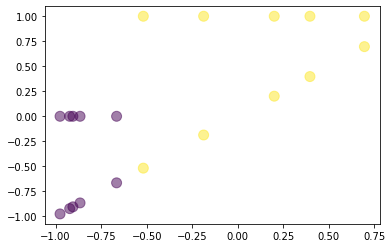

In [3]:
plt.scatter(data_X, data_X, s=100, alpha=0.5, c=data_Y)
plt.scatter(data_X, data_Y, s=100, alpha=0.5, c=data_Y)
plt.show()

In [4]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', C=1e10)
svc.fit(X, data_Y)

SVC(C=10000000000.0, kernel='linear')

In [5]:
svc.predict(X)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [6]:
data_Y

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [7]:
svc.coef_

array([[6.81253475, 6.81253475]])

In [8]:
svc.intercept_

array([8.06188029])

In [9]:
svc.intercept_[0] / svc.coef_[0, 0]

1.1833892347227537

In [10]:
svc.support_vectors_

array([[-0.66508857, -0.66508857],
       [-0.51830053, -0.51830053]])

In [11]:
_x = np.linspace(-1, 1)
fx = -_x - (svc.intercept_[0] / svc.coef_[0, 0])
fx

array([-0.18338923, -0.22420556, -0.26502189, -0.30583821, -0.34665454,
       -0.38747087, -0.42828719, -0.46910352, -0.50991985, -0.55073617,
       -0.5915525 , -0.63236883, -0.67318515, -0.71400148, -0.75481781,
       -0.79563413, -0.83645046, -0.87726679, -0.91808311, -0.95889944,
       -0.99971577, -1.04053209, -1.08134842, -1.12216474, -1.16298107,
       -1.2037974 , -1.24461372, -1.28543005, -1.32624638, -1.3670627 ,
       -1.40787903, -1.44869536, -1.48951168, -1.53032801, -1.57114434,
       -1.61196066, -1.65277699, -1.69359332, -1.73440964, -1.77522597,
       -1.8160423 , -1.85685862, -1.89767495, -1.93849128, -1.9793076 ,
       -2.02012393, -2.06094026, -2.10175658, -2.14257291, -2.18338923])

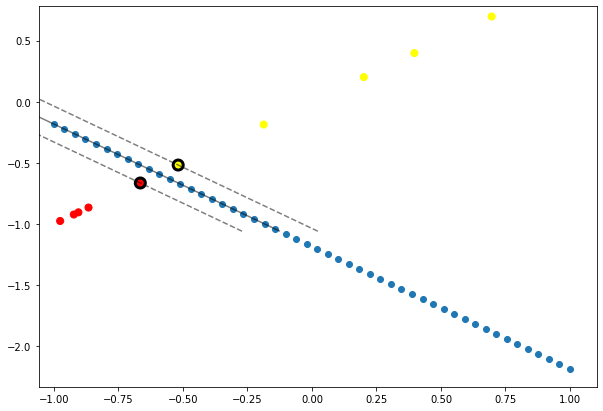

In [12]:
fig, ax = plt.subplots(figsize=(10 ,7))

plt.scatter(X[:, 0], X[:, 1], c=data_Y, s=50, cmap='autumn')

xlim = ax.get_xlim()
ylim = ax.get_ylim()

lin_x = np.linspace(xlim[0], xlim[1], 30)
lin_y = np.linspace(ylim[0], ylim[1], 30)

grid_Y, grid_X = np.meshgrid(lin_y, lin_x)

xy = np.vstack([grid_X.ravel(), grid_Y.ravel()]).T

Z = svc.decision_function(xy).reshape(grid_X.shape)

ax.contour(grid_X, grid_Y, Z, 
           colors='k', 
           levels=[-1, 0, 1], 
           alpha=0.5,
           linestyles=['--', '-', '--']
          )

ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], 
           s=100, linewidth=3, facecolors='none', edgecolors='k')

plt.scatter(_x, fx)
plt.show()

In [13]:
svc_1d = SVC(kernel='linear', C=1e10)
svc_1d.fit(X[:, [0]], data_Y)

SVC(C=10000000000.0, kernel='linear')

In [14]:
svc_1d.predict(X[:, [0]])

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [15]:
data_Y

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [16]:
svc_1d.coef_

array([[13.6250695]])

In [17]:
svc_1d.intercept_

array([8.06188029])

In [18]:
-svc.intercept_[0] / svc.coef_[0, 0]

-1.1833892347227537

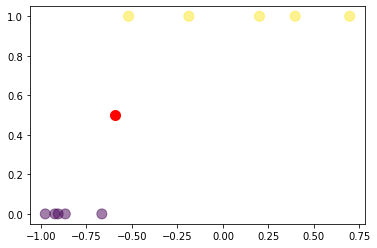

In [21]:
x = np.linspace(-1, 1)

x1 = -svc.intercept_[0] / svc.coef_[0, 0] /2

plt.scatter(data_X, data_Y, s=100, alpha=0.5, c=data_Y)
plt.scatter([x1], [0.5], s=100, c='r')
plt.show()

In [ ]:
plt.scatter(data_X, data_Y, s=100, alpha=0.5, c=data_Y)
plt.plot(x, dec_fun)
plt.show()

https://stackoverflow.com/questions/38657138/scikits-learn-svm-1-dimensional-separating-hyperplane

https://towardsdatascience.com/visualizing-the-effect-of-hyperparameters-on-support-vector-machines-b9eef6f7357b

https://stats.stackexchange.com/questions/39243/how-does-one-interpret-svm-feature-weights